## Image Segmentation Analysis with YOLOv8

This Python script utilizes the YOLOv8 model to perform object segmentation on images and calculate the percentage of area occupied by each detected object.

### Functionality:

1. Model Loading: Loads the trained YOLOv8 model from the file best.pt located in runs/segment/train7/weights/.
2. Mask Prediction:
    - Iterates over images in the specified directory (A0410_TF09).
    - Performs segmentation predictions using the YOLOv8 model.
    - Obtains the segmentation masks and associated class labels.
3. Binary Mask Generation:
    - Converts each segmentation mask into a binary (black and white) image, where white pixels represent the object mask.
    - Saves the binary images in the masks directory.
4. Area Percentage Calculation:
    - Calculates the percentage of white pixels (mask area) in each binary image.
    - Stores the file name, object class, and area percentage in a dictionary.
5. DataFrame Creation:
    - Creates a Pandas DataFrame from the data dictionary.
    - Replaces the numerical class IDs with their corresponding names using the class_names dictionary.
6. Saving Results:
    - Prints the resulting DataFrame, showing the file name, object class, and area percentage covered by each mask.
    - Saves the DataFrame to a CSV file named "A0410_TF09_porcentajes.csv".

### Requirements:

- Ultralytics: You must have the Ultralytics library installed to use YOLOv8. You can install it with pip install ultralytics.
- Pillow (PIL): Required for working with images. Install it with pip install Pillow.
- NumPy: Required for numerical operations with arrays. Install it with pip install numpy.
- Pandas: Required for creating and manipulating DataFrames. Install it with pip install pandas.

### How to Use:

- Train the Model: Make sure you have a YOLOv8 model trained for object segmentation. The weights file should be located in runs/segment/train7/weights/best.pt.
- Place Images: Place the images you want to analyze in the A0410_TF09 directory.
- Run the Script: Execute the Python script. The binary masks will be saved in the masks folder, and the results will be saved in the file A0410_TF09_porcentajes.csv.

### Customization:

- Directories: Change the images_dir and masks_dir variables to specify the correct paths to your image and mask directories.
- Class Names: Modify the class_names dictionary if your classes have different names.
- File Extensions: Adjust the valid_extensions tuple if your images have other extensions (e.g., .tif).

In [106]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from ultralytics import YOLO

# Cargar el modelo
model = YOLO("runs/segment/train7/weights/best.pt")

# Directorio con las imágenes
images_dir = "A0410_TF09"

# Directorio para guardar las máscaras (crear si no existe)
masks_dir = "masks"
os.makedirs(masks_dir, exist_ok=True)

# Diccionario para almacenar los datos
data = {'Archivo': [], 'Clase': [], 'Porcentaje_Area': []}

# Diccionario para mapear los IDs de clase a sus nombres
class_names = {
    0: "Madrepora oculata",
    1: "Desmophyllum pertusum"
}

# Extensiones de archivo válidas
valid_extensions = ('.JPG', '.jpg', '.png', '.jpeg')

# Itera sobre las imágenes en el directorio
for filename in os.listdir(images_dir):
    if filename.endswith(valid_extensions):
        # Realizar la predicción
        results = model(os.path.join(images_dir, filename))

        # Verificar si se detectaron máscaras
        if results[0].masks is not None:
            # Obtener las etiquetas de clase
            class_labels = results[0].boxes.cls

            # Iterar sobre las máscaras detectadas en la imagen
            for i, mask in enumerate(results[0].masks.data):
                # Convertir el tensor booleano en una imagen binaria
                mask_image = Image.fromarray((mask.cpu().numpy() * 255).astype(np.uint8))

                # Calcular el porcentaje de píxeles blancos (máscara)
                mask_array = np.array(mask_image)
                percentage_area = np.round(100 * np.count_nonzero(mask_array) / mask_array.size, 2)

                # Guardar la máscara como imagen binaria (opcional)
                mask_filename = f"{os.path.splitext(filename)[0]}_mask_{i}.png"
                mask_path = os.path.join(masks_dir, mask_filename)
                mask_image.save(mask_path)

                # Agregar los datos al diccionario, utilizando el nombre de la clase en lugar del ID
                data['Archivo'].append(filename)
                data['Clase'].append(class_names[class_labels[i].item()])
                data['Porcentaje_Area'].append(percentage_area)

# Crear el DataFrame
df = pd.DataFrame(data)

# Imprimir el DataFrame resultante
print(df)

# Guardar el DataFrame en un archivo CSV
df.to_csv("A0410_TF09_porcentajes.csv", index=False)



image 1/1 /home/berto/Documents/iMagine/YOLO-seg/Train/A0410_TF09/A0410_TF09_3530.JPG: 448x640 (no detections), 22.8ms
Speed: 1.2ms preprocess, 22.8ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/berto/Documents/iMagine/YOLO-seg/Train/A0410_TF09/A0410_TF09_3496.JPG: 448x640 (no detections), 22.5ms
Speed: 1.1ms preprocess, 22.5ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/berto/Documents/iMagine/YOLO-seg/Train/A0410_TF09/A0410_TF09_3444.JPG: 448x640 (no detections), 22.5ms
Speed: 1.2ms preprocess, 22.5ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/berto/Documents/iMagine/YOLO-seg/Train/A0410_TF09/A0410_TF09_3613.JPG: 448x640 2 Madrepora oculatas, 1 Desmophyllum pertusum, 22.5ms
Speed: 1.2ms preprocess, 22.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/berto/Documents/iMagine/YOLO-seg/Train/A0410_TF09/A0410_TF09_3585.JPG: 448x640 2 Madr


image 1/1 /home/berto/Documents/iMagine/YOLO-seg/Train/A0410_TF09/A0410_TF09_3613.JPG: 448x640 2 Madrepora oculatas, 1 Desmophyllum pertusum, 23.1ms
Speed: 1.1ms preprocess, 23.1ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


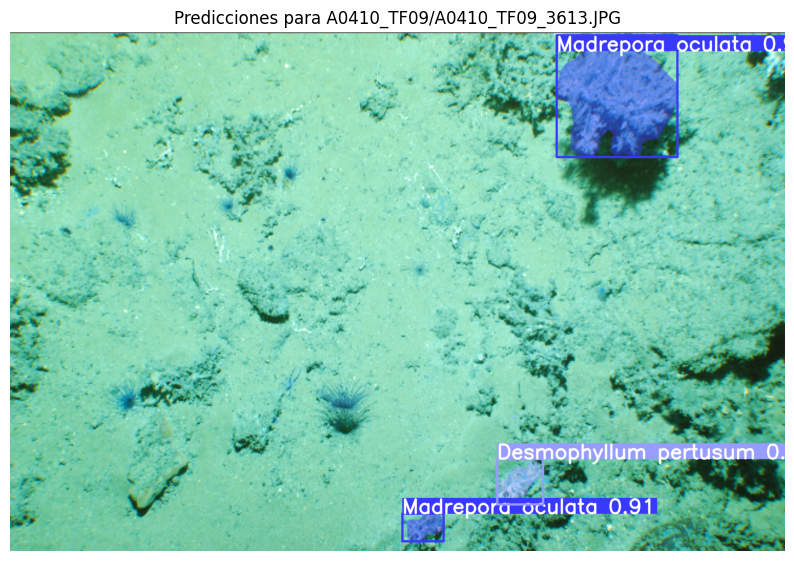

In [108]:
import os
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Cargar el modelo
model = YOLO("runs/segment/train7/weights/best.pt")

# Ruta de la imagen a mostrar
image_path = "A0410_TF09/A0410_TF09_3613.JPG"

# Realizar la predicción
results = model(image_path)

# Verificar si se detectaron máscaras
if results[0].masks is not None:
    # Visualizar la imagen con las predicciones
    result = results[0]  # Obtener el primer resultado (en este caso, solo hay uno)
    im_array = result.plot()  # Obtener el array de la imagen con las predicciones

    # Mostrar la imagen
    img = Image.fromarray(im_array)
    plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura si es necesario
    plt.imshow(img)
    plt.axis('off')  # Ocultar los ejes
    plt.title(f"Predicciones para {image_path}")
    plt.show()
else:
    print(f"No se detectaron máscaras en la imagen {image_path}")

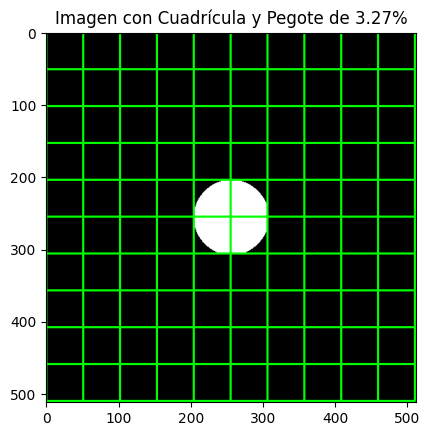

In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear una imagen vacía
imagen = np.zeros((512, 512, 3), dtype=np.uint8)

# 2. Calcular el radio del círculo que representa el 3.27% del área
area_total = 512 * 512
area_objeto = 0.0327 * area_total
radio = int(np.sqrt(area_objeto / np.pi))

# 3. Encontrar el centro de la imagen
centro_x = 512 // 2
centro_y = 512 // 2

# 4. Dibujar un círculo blanco en el centro
cv2.circle(imagen, (centro_x, centro_y), radio, (255, 255, 255), -1)  # -1 rellena el círculo

# 5. Crear la cuadrícula (igual que en el código anterior)
tamaño_celda = 512 // 10
for fila in range(10):
    for columna in range(10):
        x1 = columna * tamaño_celda
        y1 = fila * tamaño_celda
        x2 = x1 + tamaño_celda
        y2 = y1 + tamaño_celda
        cv2.rectangle(imagen, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Mostrar la imagen con matplotlib
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Cuadrícula y Pegote de 3.27%")
plt.show()